In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('ks-projects-201801.csv')

In [3]:
df.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


ID          goal       pledged        backers   usd pledged  \
count  3.786610e+05  3.786610e+05  3.786610e+05  378661.000000  3.748640e+05   
mean   1.074731e+09  4.908079e+04  9.682979e+03     105.617476  7.036729e+03   
std    6.190862e+08  1.183391e+06  9.563601e+04     907.185035  7.863975e+04   
min    5.971000e+03  1.000000e-02  0.000000e+00       0.000000  0.000000e+00   
25%    5.382635e+08  2.000000e+03  3.000000e+01       2.000000  1.698000e+01   
50%    1.075276e+09  5.200000e+03  6.200000e+02      12.000000  3.947200e+02   
75%    1.610149e+09  1.600000e+04  4.076000e+03      56.000000  3.034090e+03   
max    2.147476e+09  1.000000e+08  2.033899e+07  219382.000000  2.033899e+07   

       usd_pledged_real  usd_goal_real  
count      3.786610e+05   3.786610e+05  
mean       9.058924e+03   4.545440e+04  
std        9.097334e+04   1.152950e+06  
min        0.000000e+00   1.000000e-02  
25%        3.100000e+01   2.000000e+03  
50%        6.243300e+02   5.500000e+03  
75%        4.050000e+03   1.550000e+04  
max        2.033899e+07   1.663614e+08

In [5]:
import pandas_profiling as pp 

In [6]:
pp.ProfileReport(df,explorative=True,title='kickstarter')

Render HTML: 100%|██████████| 1/1 [00:08<00:00,  8.02s/it]


In [7]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [8]:
df['usd pledged'].fillna(method='pad',inplace=True)

In [9]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [10]:
df.shape

(378657, 15)

In [11]:
df.drop(['ID','name'],axis=1,inplace=True)
df.head(3)

category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   

              launched  pledged   state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0  failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0  failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0  failed        3      US        220.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00

In [12]:
df['state'].value_counts()

failed        197716
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1845
Name: state, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378657 entries, 0 to 378660
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   category          378657 non-null  object 
 1   main_category     378657 non-null  object 
 2   currency          378657 non-null  object 
 3   deadline          378657 non-null  object 
 4   goal              378657 non-null  float64
 5   launched          378657 non-null  object 
 6   pledged           378657 non-null  float64
 7   state             378657 non-null  object 
 8   backers           378657 non-null  int64  
 9   country           378657 non-null  object 
 10  usd pledged       378657 non-null  float64
 11  usd_pledged_real  378657 non-null  float64
 12  usd_goal_real     378657 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 40.4+ MB


In [14]:
df['country'].value_counts()

US      292624
GB       33671
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [15]:
df.category.unique()

array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People',
       'Art', 'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware',
       'Software', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear',
       'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       

In [16]:
df.currency.unique()

array(['GBP', 'USD', 'CAD', 'AUD', 'NOK', 'EUR', 'MXN', 'SEK', 'NZD',
       'CHF', 'DKK', 'HKD', 'SGD', 'JPY'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder
curr_encoder = LabelEncoder()
df['currency']=curr_encoder.fit_transform(df['currency'])
con_encoder = LabelEncoder()
df['country']=con_encoder.fit_transform(df['country'])
main_cate_enc = LabelEncoder()
df['main_category']=main_cate_enc.fit_transform(df['main_category'])
cate_encoder = LabelEncoder()
df['category']=cate_encoder.fit_transform(df['category'])

In [18]:
df.head()

category  main_category  currency    deadline     goal  \
0       108             12         5  2015-10-09   1000.0   
1        93              6        13  2017-11-01  30000.0   
2        93              6        13  2013-02-26  45000.0   
3        90             10        13  2012-04-16   5000.0   
4        55              6        13  2015-08-29  19500.0   

              launched  pledged     state  backers  country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0        9          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15       22        100.0   
2  2013-01-12 00:20:50    220.0    failed        3       22        220.0   
3  2012-03-17 03:24:11      1.0    failed        1       22          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14       22       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

In [19]:
df.drop(['deadline','launched'],inplace=True,axis=1)
print(df.columns.tolist())

['category', 'main_category', 'currency', 'goal', 'pledged', 'state', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
X = df.drop('state',axis=1)
Y = df['state']
scaled_x = StandardScaler().fit_transform(X)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import plot_confusion_matrix,confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
trainx,testx,trainy,testy = train_test_split(scaled_x,Y,test_size=.3,random_state=0)

In [24]:
model = DecisionTreeClassifier()
model.fit(trainx,trainy)

DecisionTreeClassifier()

In [25]:
model.score(testx,testy)*100

81.43101110935052

In [26]:
ypred = model.predict(testx)
print(confusion_matrix(testy,ypred))

[[ 2220  8933    83   211    78     2]
 [ 8797 49651   542    50   339    21]
 [  103   552    37   127     3     0]
 [  280    45   160 39593   105    20]
 [   91   365     6    90    14     0]
 [    7    36     1    47     0   989]]


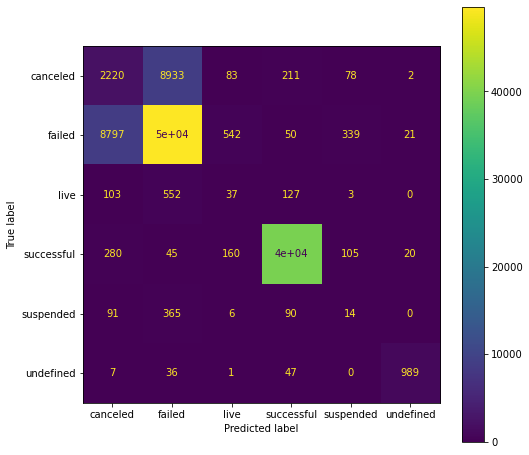

In [27]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(model,testx,testy, ax=ax)

In [28]:
import pickle

In [29]:
def save_model(path,model):
    with open(path,'wb') as f:
        pickle.dump(model,f)
    return path 

def load_model(path):
    with open(path,'rb') as f:
        return pickle.load(f) 

In [30]:
save_model('project_model.pkl',model)

'project_model.pkl'

In [31]:
save_model('mp_curr_encoder.pkl',curr_encoder)

'mp_curr_encoder.pkl'

In [32]:
save_model('mp_con_encoder.pkl',con_encoder)

'mp_con_encoder.pkl'

In [33]:
save_model('mp_main_cate_encoder.pkl',main_cate_enc)

'mp_main_cate_encoder.pkl'

In [34]:
save_model('mp_cate_encoder.pkl',cate_encoder)

'mp_cate_encoder.pkl'

In [35]:
import pickle
import numpy as np 

def load_model(path):
    with open(path,'rb') as f:
        return pickle.load(f)

In [39]:
curr_encoder = load_model('mp_curr_encoder.pkl')
con_encoder = load_model('mp_con_encoder.pkl')
main_cate_enc = load_model('mp_main_cate_encoder.pkl')
cate_encoder = load_model('mp_cate_encoder.pkl')
model = load_model('project_model.pkl')

In [40]:
category = input("Enter Category: ")
main_category = input("Enter Main_Category: ")
currency = input("Enter Currency: ")
goal = float(input('Enter Goal: '))
pledged = float(input('Enter pledged: '))
backers = int(input('Enter Backers: '))
country = input('Enter Country: ')
usd_pledged = float(input('Enter usd_pledged: ')) 
usd_pledged_real = float(input('Enter usd_pledged_real: '))
usd_goal_real = float(input('Enter usd_goal_real: '))

cate = cate_encoder.inverse_transform([[category]])
main_cate = main_cate_enc.inverse_transform([[main_category]])
curr = curr_encoder.inverse_transform([[currency]])
con = con_encoder.inverse_transform([[country]])

ValueError: y contains previously unseen labels: ['Poetry']